# Citizen activation probability for Valeria Card Kingdom Harvest Phase

In [3]:
# Setup
import random
N = 100000

import matplotlib.pyplot as plt

## Normal single die distribution

In [4]:
normal_results = []

for i in range(N):
    normal_die = random.randint(1,6)
    
    normal_results.append(normal_die)

d = {x:normal_results.count(x)/N  for x in set(normal_results)}
print(d)

{1: 0.16639, 2: 0.16918, 3: 0.16626, 4: 0.16532, 5: 0.16617, 6: 0.16668}


[(1, 0.16639), (2, 0.16918), (3, 0.16626), (4, 0.16532), (5, 0.16617), (6, 0.16668)]


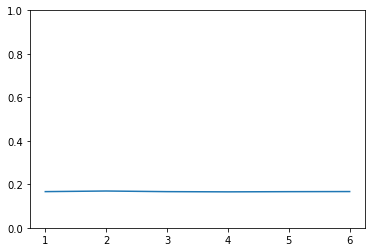

In [5]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.ylim(ymin=0, ymax=1)
plt.show()

A Citizen is activated when its activation number is matched by either

* the first die,
* the second die,
* the sum of the two dice

## Normal two dice distribution

In [6]:
normal_results = []

for i in range(N):
    normal_dice = [random.randint(1,6), random.randint(1,6)]
    
    normal_results.append(normal_dice[0] + normal_dice[1])

d = {x:normal_results.count(x)/N for x in set(normal_results)}
print(d)

{2: 0.02808, 3: 0.0552, 4: 0.08363, 5: 0.11147, 6: 0.1392, 7: 0.16777, 8: 0.13826, 9: 0.1103, 10: 0.08461, 11: 0.0549, 12: 0.02658}


[(2, 0.02808), (3, 0.0552), (4, 0.08363), (5, 0.11147), (6, 0.1392), (7, 0.16777), (8, 0.13826), (9, 0.1103), (10, 0.08461), (11, 0.0549), (12, 0.02658)]


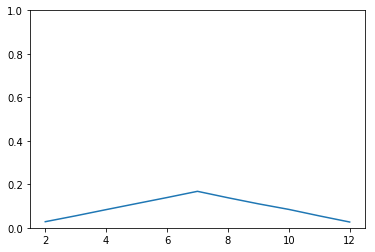

In [7]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.ylim(ymin=0, ymax=1)
plt.show()

## Two dice, count single die result or sum

In [8]:
results = []

for i in range(100000):
    dice = [ random.randint(1, 6), random.randint(1,6)]

    result = [ dice[0], dice[1], dice[0]+dice[1]]
    
    results.append(result)

In [9]:
flat_results = [item for sublist in results for item in sublist]


d = {x:flat_results.count(x)/N for x in set(flat_results)}

print(d)

{1: 0.33538, 2: 0.36274, 3: 0.38956, 4: 0.41657, 5: 0.44429, 6: 0.47113, 7: 0.16401, 8: 0.14076, 9: 0.10995, 10: 0.08281, 11: 0.05441, 12: 0.02839}


[(1, 0.33538), (2, 0.36274), (3, 0.38956), (4, 0.41657), (5, 0.44429), (6, 0.47113), (7, 0.16401), (8, 0.14076), (9, 0.10995), (10, 0.08281), (11, 0.05441), (12, 0.02839)]


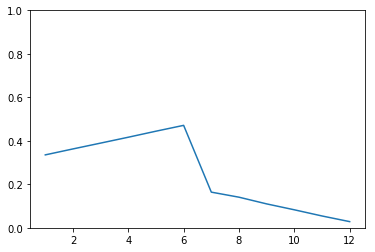

In [10]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.ylim(ymin=0, ymax=1)
plt.show()

## Citizens with double activation

Citizens like *Paladin* and *Butcher* activate with double results, 9/10 and 11/12 respectively.

In [11]:
# Paladin activates with 9/10
d[9] = d[9] + d[10]
d[10] = d[9]

# Butcher activates with 11/12
d[11] = d[11] + d[12]
d[12] = d[11]

print(d)

{1: 0.33538, 2: 0.36274, 3: 0.38956, 4: 0.41657, 5: 0.44429, 6: 0.47113, 7: 0.16401, 8: 0.14076, 9: 0.19276, 10: 0.19276, 11: 0.0828, 12: 0.0828}


[(1, 0.33538), (2, 0.36274), (3, 0.38956), (4, 0.41657), (5, 0.44429), (6, 0.47113), (7, 0.16401), (8, 0.14076), (9, 0.19276), (10, 0.19276), (11, 0.0828), (12, 0.0828)]


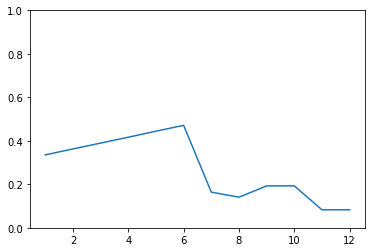

In [12]:
lists = sorted(d.items()) # sorted by key, return a list of tuples
print(lists)

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.ylim(ymin=0, ymax=1)
plt.show()

## Strategy simulation

### 666

In [70]:
test_values = [6,6,7]

scores = []

for r in range(100000):
    
    dice = [random.randint(1,6), random.randint(1,6)]
    
    dice.append(dice[0]+dice[1])
    
    scores.append(sum([test_values.count(i) for i in dice if i in test_values]))

import numpy
print(numpy.mean(scores))

1.11156


In [71]:
from itertools import product
import numpy

a = product([1,2,3,4,5,6,7,8,9,10,11,12], [1,2,3,4,5,6,7,8,9,10,11,12], [1,2,3,4,5,6,7,8,9,10,11,12])


total = []
for test_values in a:
    
    scores = []
    for r in range(10000):
    
        dice = [random.randint(1,6), random.randint(1,6)]

        dice.append(dice[0]+dice[1])

        scores.append(sum([test_values.count(i) for i in dice if i in test_values]))
        
    t = ((test_values), numpy.mean(scores))
    total.append(t)
    print(t)

((1, 1, 1), 1.0002)
((1, 1, 2), 1.0272)
((1, 1, 3), 1.0743)
((1, 1, 4), 1.0993)
((1, 1, 5), 1.1179)
((1, 1, 6), 1.137)
((1, 1, 7), 0.8387)
((1, 1, 8), 0.7956)
((1, 1, 9), 0.7808)
((1, 1, 10), 0.7433)
((1, 1, 11), 0.7063)
((1, 1, 12), 0.6933)
((1, 2, 1), 1.0236)
((1, 2, 2), 1.0626)
((1, 2, 3), 1.0625)
((1, 2, 4), 1.1215)
((1, 2, 5), 1.1302)
((1, 2, 6), 1.1687)
((1, 2, 7), 0.8613)
((1, 2, 8), 0.8446)
((1, 2, 9), 0.8139)
((1, 2, 10), 0.7861)
((1, 2, 11), 0.7572)
((1, 2, 12), 0.7177)
((1, 3, 1), 1.0573)
((1, 3, 2), 1.0862)
((1, 3, 3), 1.1183)
((1, 3, 4), 1.1357)
((1, 3, 5), 1.156)
((1, 3, 6), 1.1949)
((1, 3, 7), 0.8843)
((1, 3, 8), 0.8647)
((1, 3, 9), 0.8376)
((1, 3, 10), 0.8021)
((1, 3, 11), 0.7756)
((1, 3, 12), 0.7492)
((1, 4, 1), 1.0919)
((1, 4, 2), 1.1028)
((1, 4, 3), 1.1437)
((1, 4, 4), 1.1915)
((1, 4, 5), 1.1914)
((1, 4, 6), 1.2319)
((1, 4, 7), 0.9189)
((1, 4, 8), 0.8938)
((1, 4, 9), 0.8512)
((1, 4, 10), 0.8292)
((1, 4, 11), 0.8022)
((1, 4, 12), 0.7817)
((1, 5, 1), 1.1097)
((1, 5, 2)

((3, 10, 9), 0.5834)
((3, 10, 10), 0.5448)
((3, 10, 11), 0.5213)
((3, 10, 12), 0.4964)
((3, 11, 1), 0.7809)
((3, 11, 2), 0.7984)
((3, 11, 3), 0.8562)
((3, 11, 4), 0.8631)
((3, 11, 5), 0.8789)
((3, 11, 6), 0.9171)
((3, 11, 7), 0.6132)
((3, 11, 8), 0.5727)
((3, 11, 9), 0.5578)
((3, 11, 10), 0.5276)
((3, 11, 11), 0.4961)
((3, 11, 12), 0.4633)
((3, 12, 1), 0.7523)
((3, 12, 2), 0.779)
((3, 12, 3), 0.7856)
((3, 12, 4), 0.8308)
((3, 12, 5), 0.8663)
((3, 12, 6), 0.8879)
((3, 12, 7), 0.5813)
((3, 12, 8), 0.5597)
((3, 12, 9), 0.5331)
((3, 12, 10), 0.5067)
((3, 12, 11), 0.4703)
((3, 12, 12), 0.447)
((4, 1, 1), 1.0888)
((4, 1, 2), 1.1182)
((4, 1, 3), 1.1472)
((4, 1, 4), 1.153)
((4, 1, 5), 1.1993)
((4, 1, 6), 1.2276)
((4, 1, 7), 0.919)
((4, 1, 8), 0.8885)
((4, 1, 9), 0.8566)
((4, 1, 10), 0.8255)
((4, 1, 11), 0.8075)
((4, 1, 12), 0.7712)
((4, 2, 1), 1.1029)
((4, 2, 2), 1.1325)
((4, 2, 3), 1.1639)
((4, 2, 4), 1.199)
((4, 2, 5), 1.2315)
((4, 2, 6), 1.2435)
((4, 2, 7), 0.947)
((4, 2, 8), 0.9316)
((4, 2

((6, 8, 3), 1.0047)
((6, 8, 4), 1.0208)
((6, 8, 5), 1.0521)
((6, 8, 6), 1.076)
((6, 8, 7), 0.7876)
((6, 8, 8), 0.7476)
((6, 8, 9), 0.718)
((6, 8, 10), 0.7004)
((6, 8, 11), 0.65)
((6, 8, 12), 0.6385)
((6, 9, 1), 0.9046)
((6, 9, 2), 0.938)
((6, 9, 3), 0.963)
((6, 9, 4), 0.9832)
((6, 9, 5), 1.0289)
((6, 9, 6), 1.0544)
((6, 9, 7), 0.748)
((6, 9, 8), 0.7231)
((6, 9, 9), 0.6926)
((6, 9, 10), 0.6615)
((6, 9, 11), 0.6417)
((6, 9, 12), 0.6129)
((6, 10, 1), 0.8744)
((6, 10, 2), 0.9265)
((6, 10, 3), 0.945)
((6, 10, 4), 0.9756)
((6, 10, 5), 1.0077)
((6, 10, 6), 1.0334)
((6, 10, 7), 0.7334)
((6, 10, 8), 0.6918)
((6, 10, 9), 0.6674)
((6, 10, 10), 0.6416)
((6, 10, 11), 0.6141)
((6, 10, 12), 0.5827)
((6, 11, 1), 0.8613)
((6, 11, 2), 0.8967)
((6, 11, 3), 0.9222)
((6, 11, 4), 0.9366)
((6, 11, 5), 0.9626)
((6, 11, 6), 1.0246)
((6, 11, 7), 0.6807)
((6, 11, 8), 0.6677)
((6, 11, 9), 0.6342)
((6, 11, 10), 0.5885)
((6, 11, 11), 0.5792)
((6, 11, 12), 0.5529)
((6, 12, 1), 0.83)
((6, 12, 2), 0.863)
((6, 12, 3), 

((9, 5, 9), 0.6684)
((9, 5, 10), 0.643)
((9, 5, 11), 0.5924)
((9, 5, 12), 0.5905)
((9, 6, 1), 0.9139)
((9, 6, 2), 0.9481)
((9, 6, 3), 0.9816)
((9, 6, 4), 0.9948)
((9, 6, 5), 1.0259)
((9, 6, 6), 1.0516)
((9, 6, 7), 0.7581)
((9, 6, 8), 0.7242)
((9, 6, 9), 0.6966)
((9, 6, 10), 0.6741)
((9, 6, 11), 0.6442)
((9, 6, 12), 0.5991)
((9, 7, 1), 0.6138)
((9, 7, 2), 0.6406)
((9, 7, 3), 0.6716)
((9, 7, 4), 0.6983)
((9, 7, 5), 0.7219)
((9, 7, 6), 0.7509)
((9, 7, 7), 0.4459)
((9, 7, 8), 0.416)
((9, 7, 9), 0.3763)
((9, 7, 10), 0.3562)
((9, 7, 11), 0.3348)
((9, 7, 12), 0.3)
((9, 8, 1), 0.5815)
((9, 8, 2), 0.6116)
((9, 8, 3), 0.642)
((9, 8, 4), 0.6651)
((9, 8, 5), 0.6847)
((9, 8, 6), 0.7207)
((9, 8, 7), 0.4162)
((9, 8, 8), 0.3889)
((9, 8, 9), 0.361)
((9, 8, 10), 0.3266)
((9, 8, 11), 0.3026)
((9, 8, 12), 0.2794)
((9, 9, 1), 0.5504)
((9, 9, 2), 0.589)
((9, 9, 3), 0.6049)
((9, 9, 4), 0.6288)
((9, 9, 5), 0.6621)
((9, 9, 6), 0.6994)
((9, 9, 7), 0.3884)
((9, 9, 8), 0.3647)
((9, 9, 9), 0.3429)
((9, 9, 10), 0.3

((12, 2, 1), 0.7137)
((12, 2, 2), 0.758)
((12, 2, 3), 0.7725)
((12, 2, 4), 0.81)
((12, 2, 5), 0.8168)
((12, 2, 6), 0.8574)
((12, 2, 7), 0.5536)
((12, 2, 8), 0.526)
((12, 2, 9), 0.5007)
((12, 2, 10), 0.4668)
((12, 2, 11), 0.4399)
((12, 2, 12), 0.4216)
((12, 3, 1), 0.7508)
((12, 3, 2), 0.7766)
((12, 3, 3), 0.818)
((12, 3, 4), 0.829)
((12, 3, 5), 0.8681)
((12, 3, 6), 0.8938)
((12, 3, 7), 0.5883)
((12, 3, 8), 0.5761)
((12, 3, 9), 0.5278)
((12, 3, 10), 0.4968)
((12, 3, 11), 0.4654)
((12, 3, 12), 0.442)
((12, 4, 1), 0.775)
((12, 4, 2), 0.811)
((12, 4, 3), 0.84)
((12, 4, 4), 0.8619)
((12, 4, 5), 0.8816)
((12, 4, 6), 0.916)
((12, 4, 7), 0.6211)
((12, 4, 8), 0.581)
((12, 4, 9), 0.5542)
((12, 4, 10), 0.536)
((12, 4, 11), 0.5111)
((12, 4, 12), 0.4757)
((12, 5, 1), 0.8189)
((12, 5, 2), 0.8316)
((12, 5, 3), 0.8587)
((12, 5, 4), 0.8905)
((12, 5, 5), 0.9416)
((12, 5, 6), 0.9446)
((12, 5, 7), 0.6504)
((12, 5, 8), 0.6094)
((12, 5, 9), 0.5704)
((12, 5, 10), 0.5506)
((12, 5, 11), 0.5282)
((12, 5, 12), 0.

In [72]:
t = sorted(total, key=lambda k: k[1])[::-1]

for i in t:
    print(i)

((6, 6, 6), 1.4193)
((6, 5, 6), 1.3894)
((5, 6, 5), 1.3881)
((6, 6, 5), 1.3828)
((5, 6, 6), 1.3778)
((4, 6, 6), 1.369)
((6, 4, 6), 1.3567)
((6, 6, 4), 1.3556)
((5, 5, 5), 1.3533)
((5, 5, 6), 1.3501)
((3, 6, 6), 1.3492)
((6, 5, 5), 1.3489)
((5, 6, 4), 1.3401)
((6, 3, 6), 1.339)
((4, 5, 6), 1.337)
((5, 4, 6), 1.3352)
((4, 6, 5), 1.3344)
((6, 6, 3), 1.3321)
((6, 5, 4), 1.3281)
((6, 4, 5), 1.3245)
((6, 4, 4), 1.3194)
((5, 6, 3), 1.3181)
((6, 3, 5), 1.3153)
((4, 4, 6), 1.3119)
((2, 6, 6), 1.3113)
((6, 5, 3), 1.3063)
((5, 3, 6), 1.3055)
((3, 6, 5), 1.3051)
((4, 5, 5), 1.305)
((4, 6, 4), 1.3044)
((5, 5, 4), 1.303)
((6, 6, 2), 1.301)
((5, 4, 5), 1.2994)
((6, 2, 6), 1.2976)
((3, 5, 6), 1.2972)
((4, 3, 6), 1.2919)
((5, 2, 6), 1.2918)
((6, 3, 4), 1.2896)
((1, 6, 6), 1.2862)
((5, 5, 3), 1.2852)
((6, 4, 3), 1.2851)
((3, 6, 4), 1.2812)
((4, 6, 3), 1.2791)
((6, 2, 5), 1.2782)
((5, 3, 5), 1.2782)
((4, 5, 4), 1.2781)
((5, 6, 2), 1.2773)
((4, 4, 5), 1.2757)
((2, 5, 6), 1.2744)
((2, 6, 5), 1.2737)
((6, 5

((12, 6, 2), 0.864)
((3, 1, 8), 0.8637)
((11, 5, 2), 0.8634)
((3, 11, 4), 0.8631)
((6, 12, 2), 0.863)
((1, 5, 10), 0.8629)
((9, 3, 2), 0.8627)
((8, 3, 1), 0.8625)
((5, 11, 2), 0.8623)
((5, 10, 1), 0.862)
((12, 4, 4), 0.8619)
((3, 10, 3), 0.8619)
((2, 5, 11), 0.8618)
((3, 2, 9), 0.8617)
((2, 2, 8), 0.8616)
((11, 1, 6), 0.8613)
((6, 11, 1), 0.8613)
((1, 2, 7), 0.8613)
((6, 1, 11), 0.8611)
((4, 3, 11), 0.8609)
((2, 4, 10), 0.8604)
((4, 11, 3), 0.8602)
((10, 5, 1), 0.8598)
((9, 2, 3), 0.8597)
((1, 11, 6), 0.8595)
((9, 4, 1), 0.8593)
((3, 5, 12), 0.8591)
((12, 5, 3), 0.8587)
((1, 10, 5), 0.8581)
((5, 3, 12), 0.858)
((5, 1, 10), 0.8579)
((10, 2, 4), 0.8577)
((12, 2, 6), 0.8574)
((5, 12, 3), 0.8572)
((8, 1, 3), 0.8571)
((2, 9, 3), 0.8568)
((4, 1, 9), 0.8566)
((11, 3, 4), 0.8565)
((1, 9, 4), 0.8565)
((3, 11, 3), 0.8562)
((2, 7, 1), 0.8559)
((4, 4, 12), 0.8558)
((10, 4, 2), 0.8555)
((4, 10, 2), 0.8549)
((5, 2, 11), 0.8544)
((11, 4, 3), 0.8537)
((2, 3, 9), 0.8536)
((2, 1, 7), 0.8531)
((7, 1, 2),

((1, 7, 10), 0.5984)
((11, 7, 2), 0.5974)
((8, 4, 11), 0.5967)
((10, 7, 1), 0.596)
((7, 10, 1), 0.5958)
((9, 10, 3), 0.5937)
((11, 6, 11), 0.5935)
((11, 2, 7), 0.5929)
((10, 8, 2), 0.5928)
((9, 5, 11), 0.5924)
((8, 12, 4), 0.5922)
((10, 10, 4), 0.5905)
((9, 5, 12), 0.5905)
((9, 1, 8), 0.5905)
((8, 9, 1), 0.5894)
((11, 4, 9), 0.5892)
((9, 9, 2), 0.589)
((3, 8, 11), 0.5889)
((8, 4, 12), 0.5888)
((7, 11, 2), 0.5888)
((5, 12, 9), 0.5888)
((5, 11, 10), 0.5886)
((6, 11, 10), 0.5885)
((12, 3, 7), 0.5883)
((12, 10, 6), 0.5878)
((7, 1, 10), 0.5874)
((6, 12, 10), 0.5871)
((10, 3, 9), 0.5869)
((12, 8, 4), 0.5867)
((1, 10, 7), 0.5866)
((10, 5, 11), 0.5865)
((10, 12, 6), 0.5859)
((10, 11, 5), 0.5859)
((5, 10, 11), 0.5858)
((2, 8, 10), 0.5856)
((4, 12, 8), 0.5855)
((4, 10, 10), 0.5852)
((4, 11, 9), 0.5842)
((10, 4, 10), 0.5836)
((4, 9, 11), 0.5835)
((3, 10, 9), 0.5834)
((10, 1, 7), 0.5832)
((8, 1, 9), 0.5829)
((5, 9, 12), 0.5828)
((6, 10, 12), 0.5827)
((2, 9, 9), 0.5823)
((3, 7, 12), 0.5822)
((9, 2,

((7, 12, 12), 0.2167)
((11, 10, 10), 0.216)
((9, 10, 12), 0.2158)
((11, 11, 9), 0.2148)
((12, 10, 9), 0.2147)
((12, 7, 12), 0.2138)
((9, 12, 10), 0.2124)
((11, 12, 9), 0.1982)
((12, 10, 10), 0.1974)
((12, 8, 12), 0.1969)
((9, 12, 11), 0.1968)
((9, 11, 12), 0.1934)
((12, 11, 9), 0.1927)
((8, 12, 12), 0.1927)
((10, 12, 10), 0.1923)
((11, 9, 12), 0.1897)
((11, 10, 11), 0.1884)
((11, 11, 10), 0.1868)
((12, 9, 11), 0.186)
((12, 12, 8), 0.1853)
((10, 11, 11), 0.1817)
((10, 10, 12), 0.18)
((12, 10, 11), 0.1703)
((11, 11, 11), 0.1701)
((12, 11, 10), 0.1687)
((11, 10, 12), 0.1674)
((9, 12, 12), 0.1674)
((12, 12, 9), 0.1629)
((10, 12, 11), 0.1629)
((10, 11, 12), 0.1621)
((12, 9, 12), 0.1601)
((11, 12, 10), 0.1594)
((12, 11, 11), 0.1442)
((10, 12, 12), 0.1406)
((12, 10, 12), 0.1353)
((12, 12, 10), 0.1344)
((11, 12, 11), 0.133)
((11, 11, 12), 0.1304)
((12, 11, 12), 0.1113)
((12, 12, 11), 0.1101)
((11, 12, 12), 0.1072)
((12, 12, 12), 0.0828)
